In [3]:
# Libs para Modelagem
import numpy as np
import pandas as pd

# Libs para análise gráfica
import matplotlib.pyplot as plt
import seaborn as sns

#Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

# Lendo os dados
base_dados = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

# Verificando
base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
# Nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
# Estatísticas
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [7]:
# Info
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [10]:
# Campos únicos
base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [13]:
# Análise por ano dos incêndios
analise = base_dados.groupby(by=['year']).sum().reset_index()
analise.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


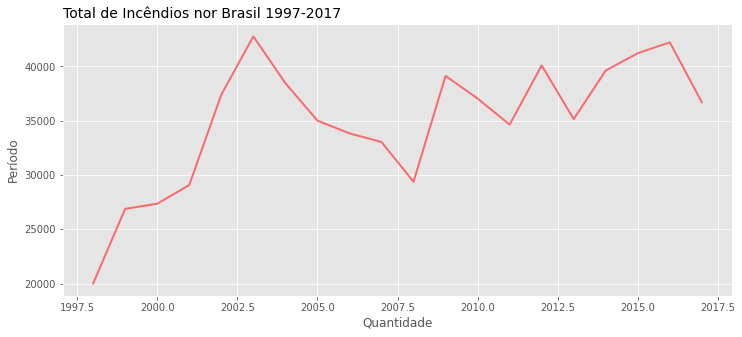

In [19]:
# Tamanho
plt.figure(figsize=(12,5))

# Style
plt.style.use('ggplot')

# Gráfico
plt.title('Total de Incêndios nor Brasil 1997-2017', loc='left', fontsize=14)
sns.lineplot(data=analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

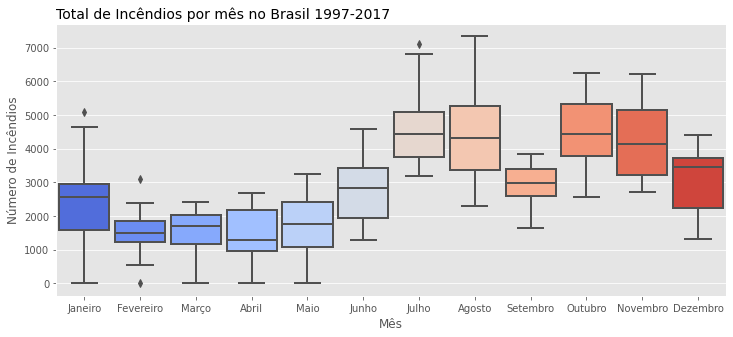

In [26]:
# Análise por mês dos incêndios
analise_02 = base_dados.groupby(by=['year', 'month']).sum().reset_index()
analise_02.head()

# Tamanho
plt.figure(figsize=(12,5))

# Gráfico por mês
plt.title('Total de Incêndios por mês no Brasil 1997-2017', loc='left', fontsize=14)
sns.boxplot(data=analise_02, x ='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2, order=['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro','Dezembro'])


# Labels
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios');

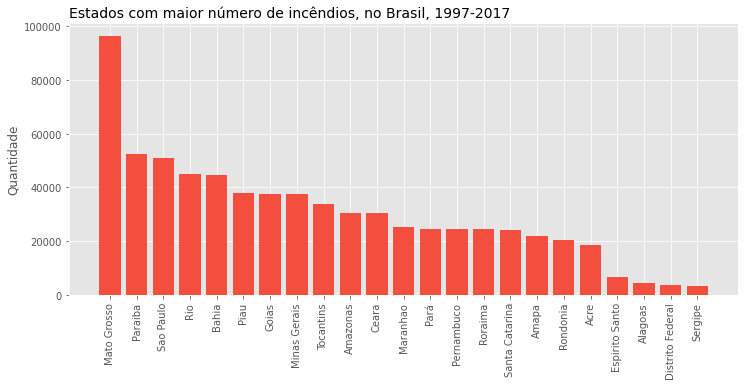

In [32]:
# Análise por estados dos incêndios
analise_03 = base_dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)
analise_03.head()

# Tamanho
plt.figure(figsize=(12,5))

# Gráfico
plt.title('Estados com maior número de incêndios, no Brasil, 1997-2017', loc='left', fontsize=14)
plt.bar(analise_03.state, analise_03['number'], color='#f44e3f')

# Labels
plt.ylabel('Quantidade')

# Para ajustar o eixo x 
plt.xticks(rotation=90);

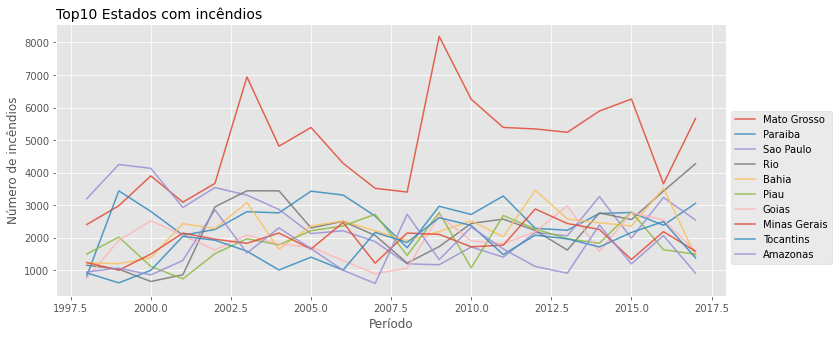

In [45]:
# Estados Top10
lista_top10 = analise_03['state'][0:10].values

# Tamanho
plt.figure(figsize=(12,5))

# Gráfico
plt.title('Top10 Estados com incêndios', loc='left', fontsize=14)

# Lopp
for coluna in lista_top10:
	
# Filtrar o Estado
	filtro = base_dados.loc[base_dados['state'] == coluna]

# Agrupar o valores para sumarizar
	analise_local = filtro.groupby(by=['year']).sum().reset_index()

# Plot
	sns.lineplot(data=analise_local, x='year', y='number', alpha=0.85)

# Labels
plt.xlabel('Período')
plt.ylabel('Número de incêndios')

# Legenda
plt.legend(lista_top10, bbox_to_anchor=(1,0.7));